# 第1章 统计学习及监督学习概论

## 多项式函数拟合问题

书P20例1.1：目标函数为$y=sin2{\pi}x$，加上正态分布的噪音干扰，使用多项式拟合。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

构造10个样本点，作为待拟合数据

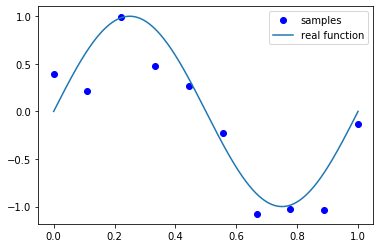

In [2]:
# 10个样本点
x = np.linspace(0, 1, 10)
y = [np.sin(2*np.pi*x_i) + np.random.normal(0, 0.2) for x_i in x]
# y=sin2 pi x曲线
xx = np.linspace(0, 1, 1000)
yy = np.sin(2*np.pi*xx)

# 绘制图表
plt.plot(x, y, 'bo', label='samples')
plt.plot(xx, yy, label='real function')
plt.legend()
plt.show()

1. 模型

模型为*n*次多项式：$f(x)=w_nx^n+w_{n-1}x^{n-1}+...+w_1x+w_0$，参数为$w=[w_n,w_{n-1},...,w_1,w_0]$

- ps: np.ploy1d([a, b, c])生成$ax^2+bx+c$

In [3]:
def func(w, x):
    f = np.poly1d(w)
    return f(x)

2. 策略

对于残差$r_i=f(x_i)-y_i$，最小二乘法最小化残差的2范数，具体地，求以下经验风险最小化：

$$L(w)=\frac{1}{2}\sum_{i=1}^N(f(x_i,w)-y_i)^2$$

3. 算法

最小二乘法

In [4]:
from scipy.optimize import leastsq

def residuals_func(w, x, y):
    ret = func(w, x) - y
    return ret

def fit(x, y, N=3):
    w_init = np.random.rand(N+1)
    w_lsq = leastsq(residuals_func, w_init, args=(x, y))
    print(w_lsq[0])
    return w_lsq[0]

def show_plot(w):
    plt.plot(xx, yy, label='real function')
    plt.plot(xx, func(w, xx), label='fitted curve')
    plt.plot(x, y, 'bo', label='samples')
    plt.legend()
    plt.show()

### M=0

[-0.11454289]


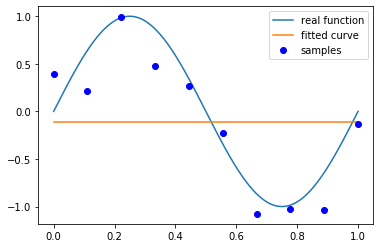

In [5]:
w = fit(x, y, N=0)
show_plot(w)

### M=1

[-1.56439915  0.66765668]


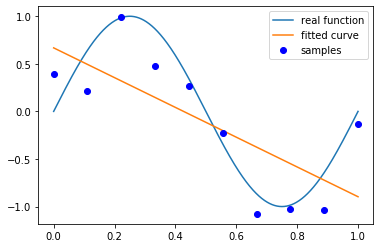

In [6]:
w = fit(x, y, N=1)
show_plot(w)

### M = 3

[ 16.99425844 -24.98972652   7.60598063   0.15452101]


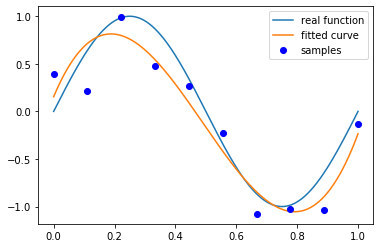

In [7]:
w = fit(x, y, N=3)
show_plot(w)

### M = 9

[  6.91484093e+03  -1.90493055e+04   9.80379211e+03   2.09969479e+04
  -3.47823615e+04   2.21668472e+04  -7.08499549e+03   1.09503618e+03
  -6.13277858e+01   3.96657058e-01]


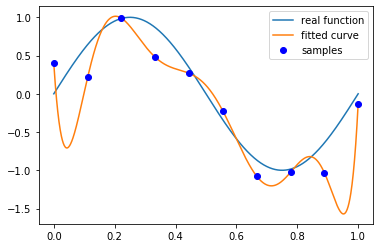

In [8]:
w = fit(x, y, N=9)
show_plot(w)